In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('leaf3d.csv')
df.head()

,Id,Contrast,Homogeneity,Correlation,Entropy,Species
0,1,0.0001,0.7937,0.9994,0.4065,Piper-Betle-Betel
1,2,0.0002,0.8389,0.9997,0.4636,Piper-Betle-Betel
2,3,0.0001,0.7610,0.9995,0.4952,Piper-Betle-Betel
3,4,0.0001,0.7871,0.9994,0.4199,Piper-Betle-Betel
4,5,0.0001,0.8015,0.9996,0.4164,Piper-Betle-Betel


In [20]:
df = df.drop(columns = ['Id'])
df.head()

,Contrast,Homogeneity,Correlation,Entropy,Species
0,0.0001,0.7937,0.9994,0.4065,Piper-Betle-Betel
1,0.0002,0.8389,0.9997,0.4636,Piper-Betle-Betel
2,0.0001,0.7610,0.9995,0.4952,Piper-Betle-Betel
3,0.0001,0.7871,0.9994,0.4199,Piper-Betle-Betel
4,0.0001,0.8015,0.9996,0.4164,Piper-Betle-Betel


In [21]:
# to display stats about data
df.describe()

,Contrast,Homogeneity,Correlation,Entropy
count,150.000000,150.000000,150.000000,150.000000
mean,0.000403,0.777635,0.995718,0.373027
std,0.000348,0.055920,0.026135,0.078088
min,0.000100,0.624100,0.678600,0.196600
25%,0.000100,0.741125,0.996600,0.316800
50%,0.000300,0.771750,0.998450,0.354250
75%,0.000600,0.817325,0.999400,0.426650
max,0.001700,0.922300,0.999800,0.572300


In [22]:
# to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Contrast     150 non-null    float64
 1   Homogeneity  150 non-null    float64
 2   Correlation  150 non-null    float64
 3   Entropy      150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [23]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

In [24]:
#df['Species'] = le.fit_transform(df['Species'])
#df.head(150)

In [25]:
# to display no. of samples on each class
df['Species'].value_counts()

Species
Piper-Betle-Betel                    50
Ocimum-Tenuiflorum-Tulsi             50
Nyctanthes-Arbor-tristis-Parijata    50
Name: count, dtype: int64

In [26]:
# check for null values
df.isnull().sum()

Contrast       0
Homogeneity    0
Correlation    0
Entropy        0
Species        0
dtype: int64

<Axes: >

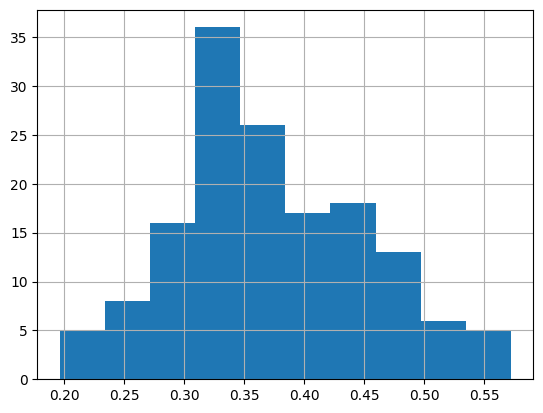

In [27]:
# histograms
df['Entropy'].hist()

<Axes: >

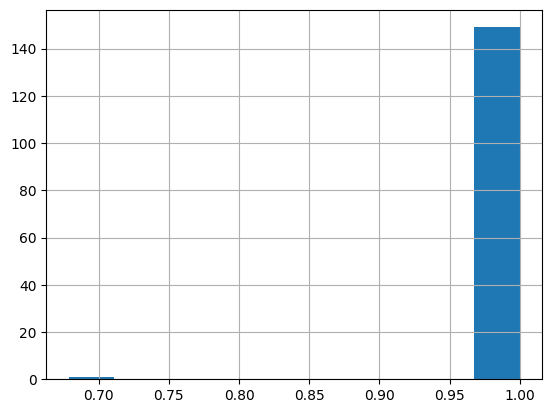

In [28]:
# histograms
df['Correlation'].hist()

<Axes: >

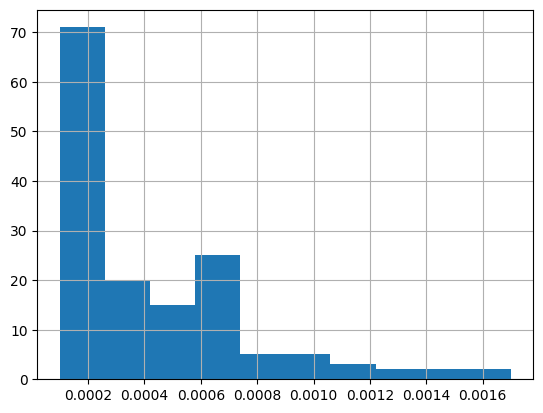

In [29]:
# histograms
df['Contrast'].hist()

<Axes: >

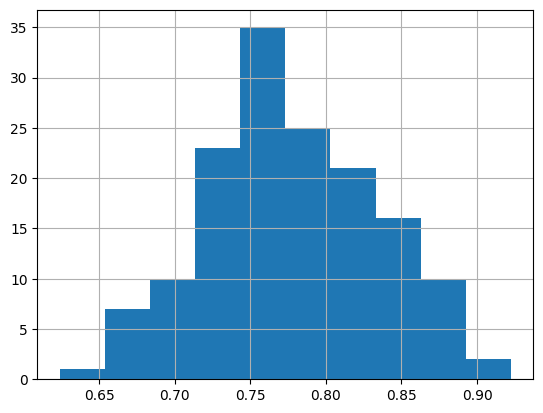

In [30]:
# histograms
df['Homogeneity'].hist()

In [31]:
# scatterplot
colors = ['red', 'orange', 'blue']
Species= ['Piper-Betle-Betel','Ocimum-Tenuiflorum-Tulsi','Nyctanthes-Arbor-tristis-Parijata']

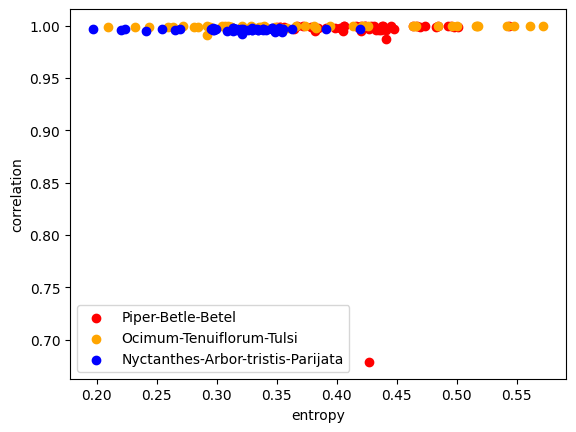

In [32]:
for i in range(3):
    x = df[df['Species'] == Species[i]]
    plt.scatter(x['Entropy'], x['Correlation'], c = colors[i], label=Species[i])
plt.xlabel("entropy")
plt.ylabel("correlation")
plt.legend()

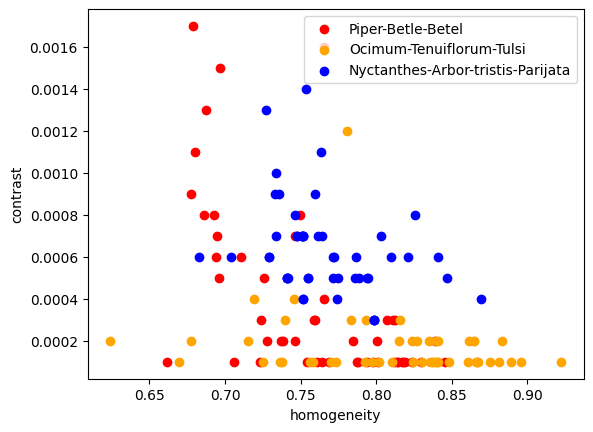

In [33]:
for i in range(3):
    x = df[df['Species'] == Species[i]]
    plt.scatter(x['Homogeneity'], x['Contrast'], c = colors[i], label=Species[i])
plt.xlabel("homogeneity")
plt.ylabel("contrast")
plt.legend()

In [34]:
df.corr()

ValueError: could not convert string to float: 'Piper-Betle-Betel'

In [35]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

In [36]:
#corr = df.corr()
#fig, ax = plt.subplots(figsize=(5,4))
#sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [37]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [38]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [39]:
# model training
model.fit(x_train, y_train)

LogisticRegression()

In [40]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  46.666666666666664


In [41]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [42]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [43]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  71.11111111111111


In [44]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [45]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [46]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  71.11111111111111


In [47]:
x_test.head()

,Contrast,Homogeneity,Correlation,Entropy
99,0.0001,0.9223,0.9991,0.2320
5,0.0001,0.7877,0.9995,0.4389
138,0.0010,0.7338,0.9942,0.3486
114,0.0007,0.7339,0.9969,0.3625
131,0.0005,0.7549,0.9973,0.3383


In [48]:
import pickle
filename = 'savedmodel.sav'
pickle.dump(model, open(filename, 'wb'))

In [49]:
load_model =pickle.load( open(filename, 'rb'))

In [50]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Assuming load_model is your trained DecisionTree model
input_features = [0.0002, 0.8151, 0.9991, 0.3073]
input_features_reshaped = np.array(input_features).reshape(1, -1)

# Make a prediction
prediction = load_model.predict(input_features_reshaped)
print(prediction)


['Ocimum-Tenuiflorum-Tulsi']
